In [1]:
%matplotlib inline

In [2]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import random
from scipy.stats import linregress
from sklearn import datasets
import seaborn as sns

In [3]:
data_00s = "data/hit_predictor/dataset-of-00s.csv"
data_2000 = "data/song_attributes/2000.csv"
spotify_tracks_db = "data/spotify_tracks_db/SpotifyFeatures.csv"

# Read Data File and store into Pandas DataFrames
data_00s = pd.read_csv(data_00s)
data_2000 = pd.read_csv(data_2000)
spotify_df = pd.read_csv(spotify_tracks_db)

In [4]:
spotify_df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [5]:
# getting dataframe using qualitative side of the data
qualitative_df=spotify_df.filter(['genre','artist_name','key','mode','popularity','track_id'], axis=1)
qualitative_df

,genre,artist_name,key,mode,popularity,track_id
0,Movie,Henri Salvador,C#,Major,0,0BRjO6ga9RKCKjfDqeFgWV
1,Movie,Martin & les fées,F#,Minor,1,0BjC1NfoEOOusryehmNudP
2,Movie,Joseph Williams,C,Minor,3,0CoSDzoNIKCRs124s9uTVy
3,Movie,Henri Salvador,C#,Major,0,0Gc6TVm52BwZD07Ki6tIvf
4,Movie,Fabien Nataf,F,Major,4,0IuslXpMROHdEPvSl1fTQK
...,...,...,...,...,...,...
232720,Soul,Slave,D,Major,39,2XGLdVl7lGeq8ksM6Al7jT
232721,Soul,Jr Thomas & The Volcanos,E,Minor,38,1qWZdkBl4UVPj9lK6HuuFM
232722,Soul,Muddy Waters,D,Major,47,2ziWXUmQLrXTiYjCg2fZ2t
232723,Soul,R.LUM.R,A,Major,44,6EFsue2YbIG4Qkq8Zr9Rir


In [6]:
#Dropping duplicates in qualitative data
clean_qualitative=qualitative_df.drop_duplicates(subset=['track_id'])
clean_qualitative

,genre,artist_name,key,mode,popularity,track_id
0,Movie,Henri Salvador,C#,Major,0,0BRjO6ga9RKCKjfDqeFgWV
1,Movie,Martin & les fées,F#,Minor,1,0BjC1NfoEOOusryehmNudP
2,Movie,Joseph Williams,C,Minor,3,0CoSDzoNIKCRs124s9uTVy
3,Movie,Henri Salvador,C#,Major,0,0Gc6TVm52BwZD07Ki6tIvf
4,Movie,Fabien Nataf,F,Major,4,0IuslXpMROHdEPvSl1fTQK
...,...,...,...,...,...,...
232716,Soul,John Legend,A#,Minor,39,1U0OMWvR89Cm20vCNar50f
232717,Soul,Belly,D,Major,43,2gGqKJWfWbToha2YmDxnnj
232719,Soul,"Bobby ""Blue"" Bland",A#,Minor,32,2iZf3EUedz9MPqbAvXdpdA
232721,Soul,Jr Thomas & The Volcanos,E,Minor,38,1qWZdkBl4UVPj9lK6HuuFM


In [7]:
movie = clean_qualitative.loc[clean_qualitative['genre'] == 'Movie']['popularity']
rnb = clean_qualitative.loc[clean_qualitative['genre'] == 'R&B']['popularity']
acapella = clean_qualitative.loc[clean_qualitative['genre'] == 'A Capella']['popularity']
alternative = clean_qualitative.loc[clean_qualitative['genre'] == 'Alternative']['popularity']
country = clean_qualitative.loc[clean_qualitative['genre'] == 'Country']['popularity']
dance = clean_qualitative.loc[clean_qualitative['genre'] == 'Dance']['popularity']
electronic = clean_qualitative.loc[clean_qualitative['genre'] == 'Electronic']['popularity']
anime = clean_qualitative.loc[clean_qualitative['genre'] == 'Anime']['popularity']
folk = clean_qualitative.loc[clean_qualitative['genre'] == 'Folk']['popularity']
blues = clean_qualitative.loc[clean_qualitative['genre'] == 'Blues']['popularity']
opera = clean_qualitative.loc[clean_qualitative['genre'] == 'Opera']['popularity']
hiphop = clean_qualitative.loc[clean_qualitative['genre'] == 'Hip-Hop']['popularity']
childrens_music = clean_qualitative.loc[clean_qualitative['genre'] == "Children's Music"]['popularity']
rap=clean_qualitative.loc[clean_qualitative['genre'] == 'Rap']['popularity']
indie = clean_qualitative.loc[clean_qualitative['genre'] == 'Indie']['popularity']
classical=clean_qualitative.loc[clean_qualitative['genre'] == 'Classical']['popularity']
pop=clean_qualitative.loc[clean_qualitative['genre'] == 'Pop']['popularity']
reggae = clean_qualitative.loc[clean_qualitative['genre'] == 'Reggae']['popularity']
reggaeton = clean_qualitative.loc[clean_qualitative['genre'] == 'Reggaeton']['popularity']
jazz = clean_qualitative.loc[clean_qualitative['genre'] == 'Jazz']['popularity']
rock = clean_qualitative.loc[clean_qualitative['genre'] == 'Rock']['popularity']
ska = clean_qualitative.loc[clean_qualitative['genre'] == 'Ska']['popularity']
comedy = clean_qualitative.loc[clean_qualitative['genre'] == 'Comedy']['popularity']
soul = clean_qualitative.loc[clean_qualitative['genre'] == 'Soul']['popularity']
soundtrack = clean_qualitative.loc[clean_qualitative['genre'] == 'Soundtrack']['popularity']
world=clean_qualitative.loc[clean_qualitative['genre'] == 'World']['popularity']

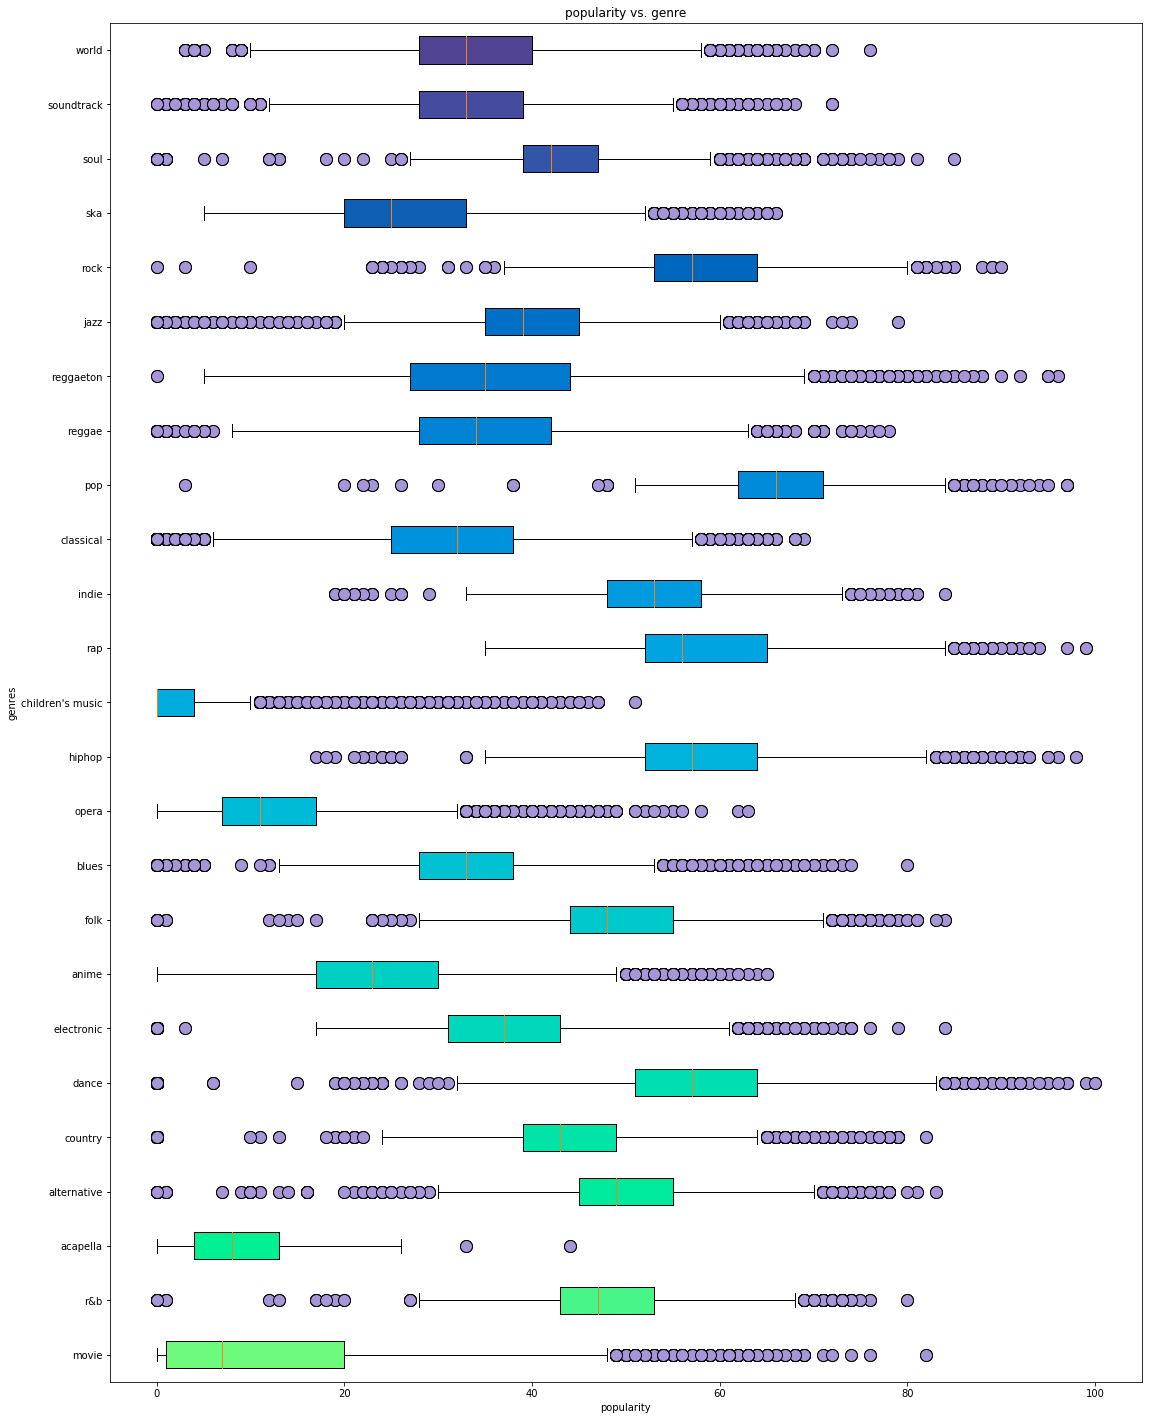

In [8]:
genres = ["movie", "r&b", "acapella", "alternative", "country", "dance", "electronic", 
          "anime", "folk", "blues", "opera", "hiphop", "children's music", "rap", "indie", 
          "classical", "pop", "reggae", "reggaeton", "jazz", "rock", "ska", "soul", 
          "soundtrack", "world"]

format_purple = dict(markerfacecolor='#a696d8',markersize=12)
regimens = [movie, rnb, acapella, alternative, country, dance, electronic, anime, 
            folk, blues, opera, hiphop, childrens_music, rap, indie, classical, pop, 
            reggae, reggaeton, jazz, rock, ska, soul, soundtrack, world]
fig1, ax1 = plt.subplots()
ax1.set_title('popularity vs. genre')
ax1.set_ylabel('genres')
ax1.set_xlabel('popularity')
fig1.set_size_inches(18.5, 25)
ax1.boxplot(regimens, flierprops=format_purple, vert=False, patch_artist=True)
box = ax1.boxplot(regimens, flierprops=format_purple, vert=False, patch_artist=True)
 
colors = ['#6efa7d', '#47f588', '#00f093', '#00ea9d', '#00e4a8', '#00deb2', '#00d7bb', '#00d0c4', '#00c9cc', '#00c2d2',
          '#00bbd8', '#00b3dc', '#00acde', '#00a4e0', '#009bdf', '#0093dd', '#008bda', '#0082d5', '#0079cf', '#0070c7', 
          '#0067be', '#0e5eb4', '#3355a9', '#454c9d', '#504391',]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    plt.setp(ax1, yticklabels=np.repeat(genres,1))
plt.savefig('output/popvgenre.png')
plt.show()

movie, rnb, acapella, alternative, country, dance, electronic, anime, folk, blues, opera, hiphop, childrens_music, rap, indie, classical, pop, reggae, reggaeton, jazz, rock, ska, comedy, soul, soundtrack, world

In [9]:
electronic=spotify_df.loc[spotify_df['genre'] == 'Dance']['energy']
world=spotify_df.loc[spotify_df['genre'] == 'World']['energy']
classical=spotify_df.loc[spotify_df['genre'] == 'Classical']['energy']
rap=spotify_df.loc[spotify_df['genre'] == 'Rap']['energy']

In [10]:
#df = electronic_df[['acousticness','danceability','energy','acousticness']]

#sns.pairplot(df, kind="scatter")
#plt.show()

In [11]:
spotify_df['key'].unique()

array(['C#', 'F#', 'C', 'F', 'G', 'E', 'D#', 'G#', 'D', 'A#', 'A', 'B'],
      dtype=object)

In [12]:
c_sharp = spotify_df.loc[spotify_df['key'] == 'C#']['popularity']
f_sharp = spotify_df.loc[spotify_df['key'] == 'F#']['popularity']
c = spotify_df.loc[spotify_df['key'] == 'C']['popularity']
f = spotify_df.loc[spotify_df['key'] == 'F']['popularity']
g = spotify_df.loc[spotify_df['key'] == 'G']['popularity']
e = spotify_df.loc[spotify_df['key'] == 'E']['popularity']
d_sharp = spotify_df.loc[spotify_df['key'] == 'D#']['popularity']
g_sharp = spotify_df.loc[spotify_df['key'] == 'G#']['popularity']
d = spotify_df.loc[spotify_df['key'] == 'D']['popularity']
a_sharp = spotify_df.loc[spotify_df['key'] == 'A#']['popularity']
a = spotify_df.loc[spotify_df['key'] == 'A']['popularity']
b = spotify_df.loc[spotify_df['key'] == 'B']['popularity']

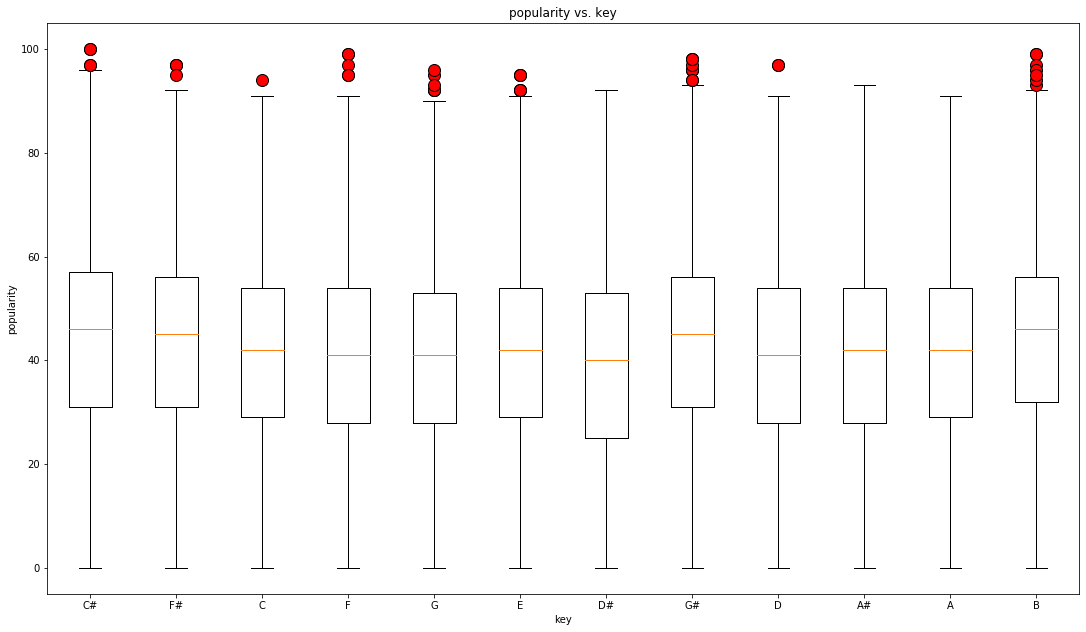

In [13]:
keys = ["C#", "F#", "C", "F", "G", "E", "D#", "G#", "D", "A#", "A", "B"]

format_red = dict(markerfacecolor='red',markersize=12)
key_list = [c_sharp, f_sharp, c, f, g, e, d_sharp, g_sharp, d, a_sharp, a, b]
fig1, ax1 = plt.subplots()
ax1.set_title('popularity vs. key')
ax1.set_ylabel('popularity')
ax1.set_xlabel('key')
plt.setp(ax1, xticklabels=np.repeat(keys,1))
fig1.set_size_inches(18.5, 10.5)
ax1.boxplot(key_list, flierprops=format_red)
plt.savefig('output/popvkey.png')
plt.show()

In [14]:
spotify_df['mode'].unique()

array(['Major', 'Minor'], dtype=object)

In [15]:
major = spotify_df.loc[spotify_df['mode'] == 'Major']['popularity']
minor = spotify_df.loc[spotify_df['mode'] == 'Minor']['popularity']

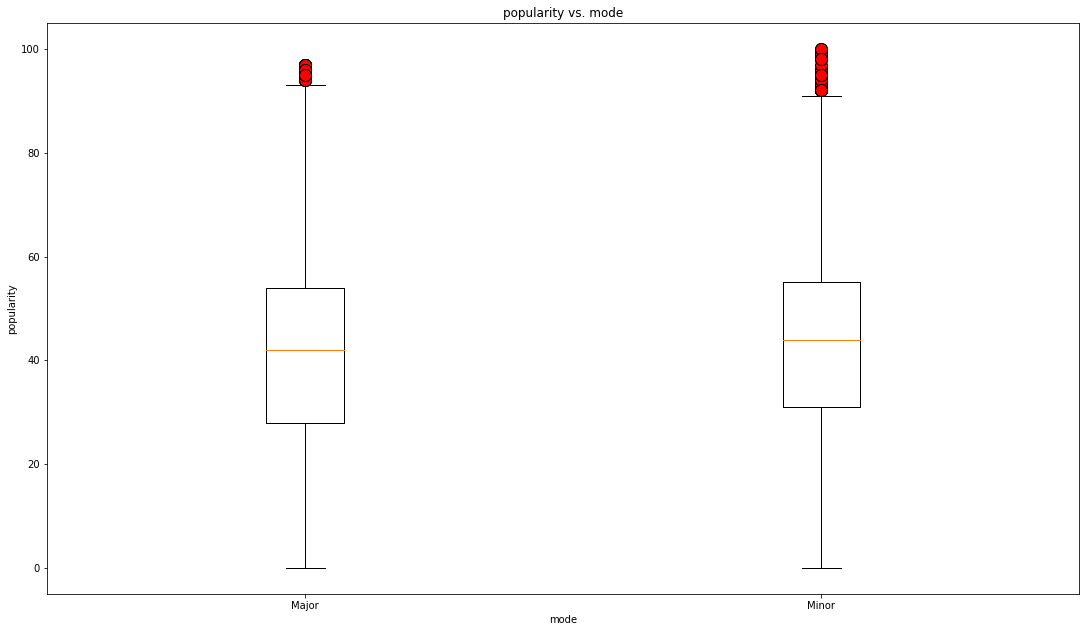

In [16]:
modes = ["Major", "Minor"]

format_red = dict(markerfacecolor='red',markersize=12)
mode_list = [major, minor]
fig1, ax1 = plt.subplots()
ax1.set_title('popularity vs. mode')
ax1.set_ylabel('popularity')
ax1.set_xlabel('mode')
plt.setp(ax1, xticklabels=np.repeat(modes,1))
fig1.set_size_inches(18.5, 10.5)
ax1.boxplot(mode_list, flierprops=format_red)
plt.savefig('output/popvmode.png')
plt.show()

In [17]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = electronic.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of electronic music is: {lowerq}")
print(f"The upper quartile of electronic music is: {upperq}")
print(f"The interquartile range of electronic music is: {iqr}")
print(f"The the median of electronic is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of electronic music is: 0.585
The upper quartile of electronic music is: 0.828
The interquartile range of electronic music is: 0.243
The the median of electronic is: 0.7120000000000001 
Values below 0.22049999999999997 could be outliers.
Values above 1.1925 could be outliers.


In [18]:
#https://colordesigner.io/gradient-generator